In [16]:
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

In [7]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [8]:
def feature_extraction(img):
    df = pd.DataFrame()


#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Original Image'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    l=[28,27,26,25,1,20,19,18,2,16,15,14,13,10,9,3,17]
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                    if num not in l:
                        gabor_label = 'Gabor' + str(num)

                        ksize=9
                        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                        kernels.append(kernel)
                        fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                        filtered_img = fimg.reshape(-1)
                        df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe



#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe


    return df

segmentimgs 0
segmentimgs 1
segmentimgs 2
segmentimgs 3
segmentimgs 4
segmentimgs 5


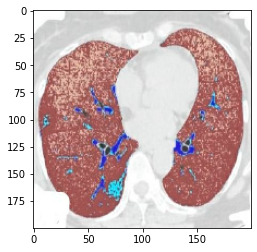

In [9]:
path=r'C:\Users\sudhakararao\Desktop\Project'
l=['segmentimgs']
data=[]
for i in l:
    c=0
    dataset=os.path.join(path,i)
    #print(dataset)
    for j in os.listdir(dataset):
        imagepath=os.path.join(dataset,j)
        #print(imagepath)
        img=cv2.imread(imagepath)
        #print(img,img.shape)
        img=cv2.resize(img,(200,200))
        plt.imshow(img)
        data.append(img)
        print(i,c)
        c+=1

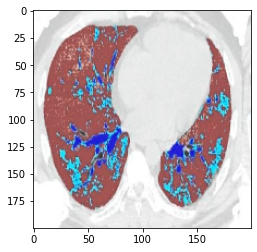

In [7]:
plt.imshow(data[3])

In [10]:
input1=data[2]
output1=data[3]

In [11]:
inputresult = cv2.cvtColor(input1, cv2.COLOR_BGR2GRAY)
outputresult = cv2.cvtColor(output1, cv2.COLOR_BGR2GRAY)

(200, 200)


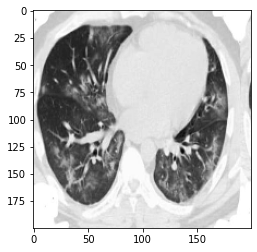

In [12]:
plt.imshow(inputresult,cmap='gray')
print(inputresult.shape)

In [13]:
df=feature_extraction(inputresult)
img2 = outputresult.reshape(-1)
df['Original Image'] = img2
print(df)

       Original Image  Gabor4  Gabor5  Gabor6  Gabor7  Gabor8  Gabor11  \
0                 255     255     255     232     171      94      255   
1                 255     255     255     232     171      94      255   
2                 255     255     255     232     171      94      255   
3                 255     255     255     232     171      94      255   
4                 255     255     255     232     171      94      255   
...               ...     ...     ...     ...     ...     ...      ...   
39995             255     255     255     232     171      94      255   
39996             255     255     255     232     171      94      255   
39997             255     255     255     232     171      94      255   
39998             255     255     255     232     171      94      255   
39999             255     255     255     232     171      94      255   

       Gabor12  Gabor21  Gabor22  ...  Gabor32  Canny Edge  Roberts  Sobel  \
0          255      153        2 

In [14]:
Y = df["Original Image"].values
X = df.drop(labels = ["Original Image"], axis=1) 

In [13]:
print(Y)

[255 255 255 ... 255 255 255]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=20)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [16]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [17]:
prediction_test_train = model.predict(X_train) 


In [18]:
prediction_test = model.predict(X_test)

In [19]:
from sklearn import metrics
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy on training data =  0.9978030303030303
Accuracy =  0.13


In [20]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Gaussian s7    0.078599
Scharr         0.070328
Prewitt        0.068782
Roberts        0.068489
Sobel          0.066265
Gaussian s3    0.064634
Gabor31        0.059978
Variance s3    0.056901
Median s3      0.056889
Gabor32        0.054714
Gabor21        0.053554
Gabor6         0.053397
Gabor29        0.049134
Gabor7         0.046399
Gabor24        0.040302
Gabor30        0.038569
Gabor8         0.033348
Gabor5         0.015793
Gabor23        0.012091
Gabor22        0.004675
Canny Edge     0.003330
Gabor4         0.003311
Gabor12        0.000516
Gabor11        0.000002
dtype: float64


In [ ]:
#Save the trained model as pickle string to disk for future use
filename = "sandstone_model"
pickle.dump(model, open(filename, 'wb'))



In [ ]:
#To test the model on future datasets
loaded_model = pickle.load(open('sandstone_model', 'rb'))
result = loaded_model.predict(X)

segmented = result.reshape((inputresult.shape))


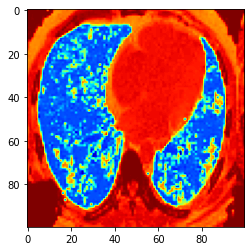

In [69]:
from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')
plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')